In [1]:
from __future__ import print_function, division

import numpy as np
import pandas as pd
import os
import matplotlib as plt
from pandas import DataFrame
from datetime import datetime
from time import time
import pylab as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/zhoubaoling/anaconda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt', 'datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [6]:
#download 911 call data from Kaggle
#https://www.kaggle.com/mchirico/montcoalert
os.system("curl -O https://raw.githubusercontent.com/baolingz/PUI2017_bz882/master/HW8_bz882/911%20copy.csv")
os.system("mv " + "911%20copy.csv " + os.getenv("PUIDATA"))

0

In [23]:
df = pd.read_csv( os.getenv("PUIDATA") + "/911%20copy.csv")

In [24]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [25]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [26]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [27]:
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [15]:
#dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
#df['Day of Week'] = df['Day of Week'].map(dmap)

In [28]:
reason = df.groupby(['Day of Week','Reason'])['title'].count().unstack()

In [29]:
reason

Reason,EMS,Fire,Traffic
Day of Week,,,
0,7240,2204,5236
1,7222,2121,5807
2,6966,2227,5686
3,6993,2136,5349
4,7315,2088,5430
5,6685,2068,4583
6,6456,2076,3604


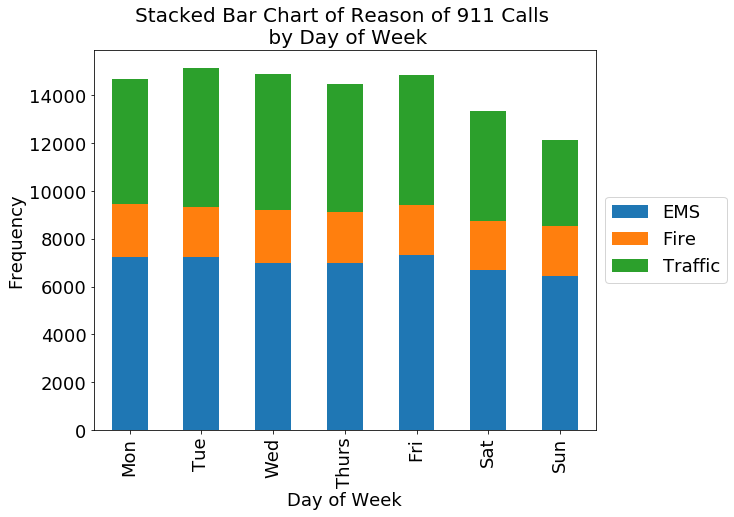

In [41]:
fig = plt.figure(figsize=(10,8))
ax = reason.plot.bar(stacked=True, figsize = (9,7),fontsize = 18)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),fontsize = 18)
ax.set_title('Stacked Bar Chart of Reason of 911 Calls \n by Day of Week', fontsize = 20)
ax.set_xlabel('Day of Week', fontsize = 18)
ax.set_ylabel('Frequency', fontsize = 18)
ax.xaxis.set_ticklabels(['Mon', 'Tue','Wed','Thurs','Fri','Sat','Sun'], fontsize=18)

### According to the stacked bar chart, we can see that emergency medical service is the most frequent 911 call reason, then fire calls. 911 calls caused by traffic is the least frequent. In addition, there were comparably less 911 Calls received during weekends